<a href="https://colab.research.google.com/github/priyankabaswa/TeensSurvey/blob/main/teens_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pyreadstat

     |████████████████████████████████| 2.5MB 5.2MB/s 


In [3]:
pip install pyspark

     |████████████████████████████████| 212.4MB 57kB/s 
     |████████████████████████████████| 204kB 18.0MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=156a6f649a54e9b94d789328d948336ae1e9de06a6534f2ddcd39f7847e4fa87
  Stored in directory: /root/.cache/pip/wheels/40/1b/2c/30f43be2627857ab80062bef1527c0128f7b4070b6b2d02139
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

# context config/setup 
sc = SparkContext(conf=SparkConf().setMaster('local[8]'))
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

In [10]:
import pyreadstat
df, meta = pyreadstat.read_sav("/content/March 7-April 10, 2018 - Teens and Tech Survey - SPSS.sav", apply_value_formats=False)

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)

Printing column names and their label names to get mapping understanding

In [12]:
lables_to_cols = meta.column_names_to_labels

#for key, value in lables_to_cols.items():
  #print(key, "|", value, '\n')

In [ ]:
df.groupby("FITIN")['CASEID'].count()
#df.count()

In [9]:
from pyspark.sql.functions import col

In [13]:
spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")
spark_df = spark.createDataFrame(df)

In [11]:
#spark_df.show(10, truncate=True)
spark_df.select("CASEID", "SOC1", "SOC1A_BAD_1", "SOC1A_BAD_2", "SOC1A_BAD_3", "SOC1A_BAD_4", "SOC1A_BAD_5", "SOC1A_BAD_6", "SOC1A_BAD_7").show(n=5, truncate=False)

+------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|CASEID|SOC1|SOC1A_BAD_1|SOC1A_BAD_2|SOC1A_BAD_3|SOC1A_BAD_4|SOC1A_BAD_5|SOC1A_BAD_6|SOC1A_BAD_7|
+------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|2.0   |3.0 |null       |null       |null       |null       |null       |null       |null       |
|7.0   |2.0 |1.0        |null       |null       |null       |null       |null       |null       |
|9.0   |3.0 |null       |null       |null       |null       |null       |null       |null       |
|10.0  |2.0 |null       |null       |null       |1.0        |null       |null       |null       |
|13.0  |2.0 |null       |1.0        |null       |null       |null       |null       |null       |
+------+----+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
only showing top 5 rows



**In Person - School Related Activities**

25% teens show interest in meeting in person with their friends multiple times a week

In [7]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt

print(lables_to_cols['FRIEND1'])
friend1 = spark_df.groupBy("FRIEND1").count().select('FRIEND1', f.col('count').alias('cnt'))
friend1 = friend1.selectExpr("FRIEND1", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = friend1.toPandas()
pdf.plot(x='FRIEND1', y='percentage', kind = 'bar')
plt.show()

NameError: ignored

**Online Meetings**

60% of the teens wanted to talk every day through several modes

In a typical week, how often do you get together with friends...Online (including on your cellphone, on social media, or through online gaming)?


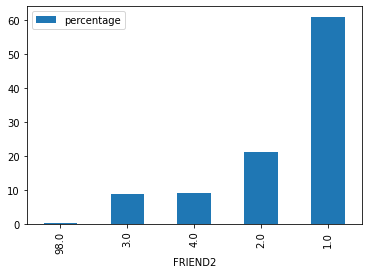

In [14]:
print(lables_to_cols['FRIEND2'])
friend2 = spark_df.groupBy("FRIEND2").count().select('FRIEND2', f.col('count').alias('cnt'))
friend2 = friend2.selectExpr("FRIEND2", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = friend2.toPandas()
pdf.plot(x='FRIEND2', y='percentage', kind = 'bar')

**In Person**

50% of the teens wanted to meet for about the right time to meet in person and only less than 10% wanted to engage more time.

In general, how much time would you say you spend with your friends IN PERSON?


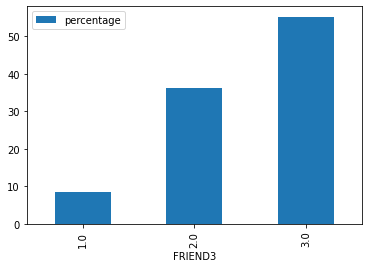

In [15]:
print(lables_to_cols['FRIEND3'])
friend3 = spark_df.groupBy("FRIEND3").count().select('FRIEND3', f.col('count').alias('cnt'))
friend3 = friend3.selectExpr("FRIEND3", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = friend3.toPandas()
pdf.plot(x='FRIEND3', y='percentage', kind = 'bar')

**Age**

25% of the survey respondents are of 13 years old and 18% of them are 14 years old

Age - in years


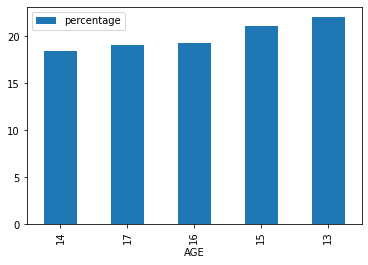

In [16]:
print(lables_to_cols['AGE'])
age = spark_df.groupBy("AGE").count().select('AGE', f.col('count').alias('cnt'))
age = age.selectExpr("AGE", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = age.toPandas()
pdf.plot(x='AGE', y='percentage', kind = 'bar')

**Device**

75% of teens use smartphone and less than 2 % use without any device


Device type


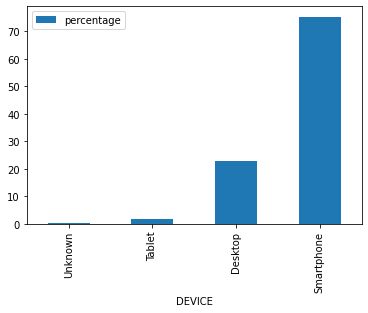

In [17]:
print(lables_to_cols['DEVICE'])
device = spark_df.groupBy("DEVICE").count().select('DEVICE', f.col('count').alias('cnt'))
device = device.selectExpr("DEVICE", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = device.toPandas()
pdf.plot(x='DEVICE', y='percentage', kind = 'bar')

**INTREQ**

Almost 50% of teens wanted to stay online continuously either on computer, mobile phone; 40% of them wanted to stay online several times a day

About how often do you use the internet, either on a computer or a cellphone?


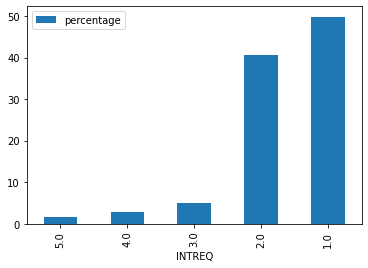

In [18]:
print(lables_to_cols['INTREQ'])
intreq = spark_df.groupBy("INTREQ").count().select('INTREQ', f.col('count').alias('cnt'))
intreq = intreq.selectExpr("INTREQ", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = intreq.toPandas()
pdf.plot(x='INTREQ', y='percentage', kind = 'bar')

**Gaming**

More than 80% of the teens play video games

Do you ever play video games – on a computer, game console or cellphone?


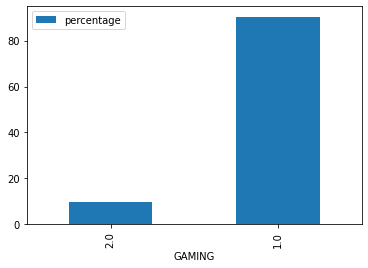

In [19]:
print(lables_to_cols['GAMING'])
gaming = spark_df.groupBy("GAMING").count().select('GAMING', f.col('count').alias('cnt'))
gaming = gaming.selectExpr("GAMING", "CNT"," round((cnt / 743)*100, 2) as percentage").sort("percentage")
pdf = gaming.toPandas()
pdf.plot(x='GAMING', y='percentage', kind = 'bar')

**Social Media**

 
1.   There are no teens who are using ALL the social media websites
2.   3.5 % of the teens are using ALL the social media platforms except Reddit and Tumblr



all teens head count is  743
teens who are active on all  social media platform count is  0
social media users except reddit and tumblr is  3.5 %


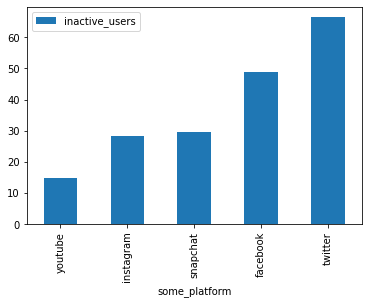

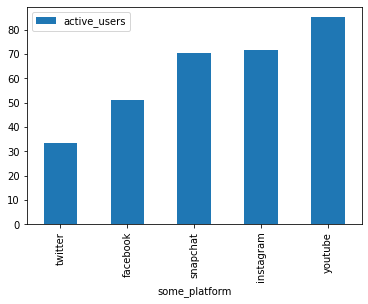

In [18]:
from pyspark.sql.functions import col, lit
from functools import reduce
from pyspark.sql import DataFrame
import matplotlib.pyplot as plt 
import pandas as pd

all_soc_media = spark_df.where((col("SNS1_1") == 1.0) & (col("SNS1_2") == 1.0) 
               & (col("SNS1_3") == 1.0) & (col("SNS1_4") == 1.0)
               & (col("SNS1_5") == 1.0) & (col("SNS1_6") == 1.0) 
               & (col("SNS1_7") == 1.0) & (col("SNS1_8") == 1.0))

all_except_reddit_and_tumblr = spark_df.where((col("SNS1_1") == 1.0) & (col("SNS1_2") == 1.0) 
               & (col("SNS1_3") == 1.0) & (col("SNS1_4") == 1.0)
               & (col("SNS1_5") == 1.0) & (col("SNS1_6") == 1.0) 
               )

df_count = spark_df.count()
round((all_except_reddit_and_tumblr.count()/df_count)*100, 2)

twitter = spark_df.groupBy("SNS1_1").count().selectExpr("SNS1_1 as active_inactive", "count").withColumn("some_platform", lit("twitter"))
instagram = spark_df.groupBy("SNS1_2").count().selectExpr("SNS1_2 as active_inactive", "count").withColumn("some_platform", lit("instagram"))
facebook = spark_df.groupBy("SNS1_3").count().selectExpr("SNS1_3 as active_inactive", "count").withColumn("some_platform", lit("facebook"))
snapchat = spark_df.groupBy("SNS1_4").count().selectExpr("SNS1_4 as active_inactive","count").withColumn("some_platform", lit("snapchat"))
youtube = spark_df.groupBy("SNS1_5").count().selectExpr("SNS1_5 as active_inactive","count").withColumn("some_platform", lit("youtube"))

dfs = {twitter, instagram, facebook, snapchat, youtube}
combined = reduce(DataFrame.union, dfs)
combined_inactive = combined.filter(col("active_inactive") == 0.0).selectExpr("active_inactive", "some_platform", "count", "round((count / 743)*100, 2) as percentage").sort("percentage")
combined_active = combined.filter(col("active_inactive") == 1.0).selectExpr("active_inactive", "some_platform", "count", "round((count / 743)*100, 2) as percentage").sort("percentage")
pdf_inactive = combined_inactive.toPandas()
pdf_active = combined_active.toPandas()
pdf_inactive.plot(x = 'some_platform' , y = 'percentage',label = 'inactive_users',  kind = 'bar')
pdf_active.plot(x = 'some_platform',y = 'percentage', label = 'active_users', kind = 'bar')

print("all teens head count is " , df_count)
print("teens who are active on all  social media platform count is " , all_soc_media.count())
print("social media users except reddit and tumblr is " ,round((all_except_reddit_and_tumblr.count()/df_count)*100, 2) , "%")

**Social Media Impact**

1.   13% of teens use social media sites for communication among themselves and only less than 2% of them use for learning purpose
2.   8% of teens gets bullied, 6% are harming their relationships whereas happiness is only 3%



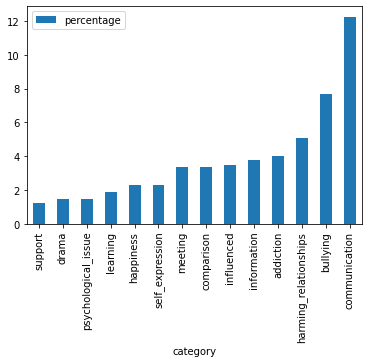

In [54]:
communication = spark_df.where(col("SOC1A_GOOD_1").isNotNull()).groupBy("SOC1A_GOOD_1").count().select("SOC1A_GOOD_1", f.col('count').alias('cnt')).withColumn("category", lit("communication")).withColumnRenamed("SOC1A_GOOD_1", "label")
meeting = spark_df.where(col("SOC1A_GOOD_2").isNotNull()).groupBy("SOC1A_GOOD_2").count().select("SOC1A_GOOD_2", f.col('count').alias('cnt')).withColumn("category", lit("meeting")).withColumnRenamed("SOC1A_GOOD_2", "label")
support = spark_df.where(col("SOC1A_GOOD_3").isNotNull()).groupBy("SOC1A_GOOD_3").count().select("SOC1A_GOOD_3", f.col('count').alias('cnt')).withColumn("category", lit("support")).withColumnRenamed("SOC1A_GOOD_3", "label")
learning = spark_df.where(col("SOC1A_GOOD_4").isNotNull()).groupBy("SOC1A_GOOD_4").count().select("SOC1A_GOOD_4", f.col('count').alias('cnt')).withColumn("category", lit("learning")).withColumnRenamed("SOC1A_GOOD_4", "label")
information = spark_df.where(col("SOC1A_GOOD_5").isNotNull()).groupBy("SOC1A_GOOD_5").count().select("SOC1A_GOOD_5", f.col('count').alias('cnt')).withColumn("category", lit("information")).withColumnRenamed("SOC1A_GOOD_5", "label")
self_expression = spark_df.where(col("SOC1A_GOOD_6").isNotNull()).groupBy("SOC1A_GOOD_6").count().select("SOC1A_GOOD_6", f.col('count').alias('cnt')).withColumn("category", lit("self_expression")).withColumnRenamed("SOC1A_GOOD_6", "label")
happiness = spark_df.where(col("SOC1A_GOOD_7").isNotNull()).groupBy("SOC1A_GOOD_7").count().select("SOC1A_GOOD_7", f.col('count').alias('cnt')).withColumn("category", lit("happiness")).withColumnRenamed("SOC1A_GOOD_7", "label")

dfs_good_social = {communication, meeting, support, learning, information, self_expression, happiness}
combined_good_social = reduce(DataFrame.union, dfs_good_social)
combined_good_social = combined_good_social.selectExpr("round((cnt/743)*100, 2) as percentage", "category").sort("percentage")

psychological_issue = spark_df.where(col("SOC1A_BAD_1").isNotNull()).groupBy("SOC1A_BAD_1").count().select("SOC1A_BAD_1", f.col('count').alias('cnt')).withColumn("category", lit("psychological_issue")).withColumnRenamed("SOC1A_BAD_1", "label")
bullying = spark_df.where(col("SOC1A_BAD_2").isNotNull()).groupBy("SOC1A_BAD_2").count().select("SOC1A_BAD_2", f.col('count').alias('cnt')).withColumn("category", lit("bullying")).withColumnRenamed("SOC1A_BAD_2", "label")
addiction = spark_df.where(col("SOC1A_BAD_3").isNotNull()).groupBy("SOC1A_BAD_3").count().select("SOC1A_BAD_3", f.col('count').alias('cnt')).withColumn("category", lit("addiction")).withColumnRenamed("SOC1A_BAD_3", "label")
harming_relationships = spark_df.where(col("SOC1A_BAD_4").isNotNull()).groupBy("SOC1A_BAD_4").count().select("SOC1A_BAD_4", f.col('count').alias('cnt')).withColumn("category", lit("harming_relationships")).withColumnRenamed("SOC1A_BAD_4", "label")
influenced = spark_df.where(col("SOC1A_BAD_5").isNotNull()).groupBy("SOC1A_BAD_5").count().select("SOC1A_BAD_5", f.col('count').alias('cnt')).withColumn("category", lit("influenced")).withColumnRenamed("SOC1A_BAD_5", "label")
comparison = spark_df.where(col("SOC1A_BAD_6").isNotNull()).groupBy("SOC1A_BAD_6").count().select("SOC1A_BAD_6", f.col('count').alias('cnt')).withColumn("category", lit("comparison")).withColumnRenamed("SOC1A_BAD_6", "label")
drama = spark_df.where(col("SOC1A_BAD_7").isNotNull()).groupBy("SOC1A_BAD_7").count().select("SOC1A_BAD_7", f.col('count').alias('cnt')).withColumn("category", lit("drama")).withColumnRenamed("SOC1A_BAD_7", "label")

dfs_bad_social = {psychological_issue, bullying, addiction, harming_relationships, influenced, comparison, drama}
combined_bad_social = reduce(DataFrame.union, dfs_bad_social)
combined_bad_social = combined_bad_social.selectExpr("round((cnt/743)*100, 2) as percentage", "category").sort("percentage")

combined_social_dfs = {combined_good_social, combined_bad_social}
combined_social = reduce(DataFrame.union, combined_social_dfs).sort("percentage")
#combined_social.show()
pdf = combined_social.toPandas()
pdf.plot(x = 'category', y = 'percentage', kind = 'bar')


Similarly for next group of questions belonging to a category, can be grouped and analysis can be found out. 

**System Design**

Entire python code can be put into a single file and we could create multiple tables dependeing on the category. 
Each category can be visualized on the dashboard like PowerBI or Tableau. 
The entire python code can be put into a scheduler tool like creating a batch job. We can either create multiple partitions for the tables and use the partition values against the labels to show case the differences.
For eg., if the spss file is recieved every week - this file can be put into a unix server. Based on the agreed file recieved time, after 30 min or so, our python job should read this file and create the tables. Entire python job is currently taking less than 10 min for fewer categories. If we have all the categories established, we can think of an hour for batch job completion and soon after that time, PowerBI report can be scheduled for refresh.  Through this way - we can automate end2end job as a batch offering. 
For real time, we should recieve data in API of these feeds and create the batch job accordingly and PowerBi refresh.
